**BIVARIATE**

* Categorical vs Categorical Target --> Count + pct for each category and target category; Count + pct for each target category; Grouped count plot with hue=target; Grouped bar plot with percentages with hue=target and lines indicating target percentages without grouping

* Categorical vs Numerical Target --> Descibe for numerical target alone and for each category; Boxplot for each category with reference line with mean(median) for target alone; overlapping distributions for each value of categorical variable; QQ-plot 

* Numerical vs Categorical Target --> Describe for numerical variable alone and for each target category; Boxplot for each category with reference line with mean (median) for variable alone; overlapping distributions for each value of target variable; QQ-plot

* Numerical vs Numerical target --> Describe for both variable and target; Correlation values; Scatterplot


**TRIVARIATE**

* 2 Categorical vs Categorical target --> Count + pct for each category and target category; Count + pct for each target category; For each value of target, two heatmaps: one with percentages of the corresponding value for each pair of category values, and one with the difference between the first one, and the pct of the target value without grouping.

* 2 categorical vs numerical target --> Grouped boxplot with x=categorical, y=target, hue=categorical

* 1 Categorical, 1 Numerical vs Categorical target --> Grouped boxplot with x=Categorical, y=numerical, hue=target

* 1 Categorical, 1 Numerical vs Numerical target --> Scatterplot with hue=categorical

* 2 Numerical vs Categorical target --> Scatterplot with hue=target

* 2 Numerical vs numerical target --> heatmap


In [2]:
'''
Helper functions to do EDA
'''

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec
from dython import nominal

In [3]:
sns.__version__

'0.11.0'

## Read Data

In [4]:
DATA_PATH = os.path.join(os.getcwd(), 'titanic')

In [5]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df["Pclass"] = train_df["Pclass"].astype("category") 

## Bivariate plots

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
#del sys.modules['AutoEDA']
#del test

In [32]:
import sys, importlib
#importlib.reload(sys.modules['AutoEDA'])
import AutoEDA.AutoEDA as eda
#import AutoEDA as eda

In [12]:
%matplotlib notebook

In [13]:
column_cat, column_num = "Pclass", "Age"
column_cat2 = "Sex"
column_cat3 = "Survived"
column_num1, column_num2 = "Age", "Fare"
column_num3 = "SibSp"
dataframe = train_df

In [14]:
dataframe["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
from matplotlib.widgets import Slider


In [16]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [17]:
sns.set_style('darkgrid')

In [22]:
corr_dict = nominal.compute_associations(dataframe, theil_u=True, clustering=True,
                    nan_strategy='drop_samples',
                    mark_columns=True)

In [26]:
corr_dict

,Name (nom),Ticket (nom),Pclass (nom),Cabin (nom),Sex (nom),Embarked (nom),PassengerId (con),Age (con),SibSp (con),Parch (con),Survived (con),Fare (con)
Name (nom),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ticket (nom),0.942212,1.000000,1.000000,0.967164,0.740743,0.995224,0.875688,0.916800,0.947841,0.906266,0.927549,1.000000
Pclass (nom),0.146880,0.155889,1.000000,0.247437,0.014644,0.095323,0.035802,0.365891,0.092652,0.018653,0.339817,0.594217
Cabin (nom),0.244296,0.250765,0.411544,1.000000,0.194766,0.262345,0.419046,0.524194,0.265690,0.421113,0.520076,0.827625
Sex (nom),0.095538,0.075110,0.009525,0.076168,1.000000,0.012509,0.042939,0.024978,0.114631,0.245489,0.543351,0.182333
Embarked (nom),0.114028,0.120444,0.074002,0.122453,0.014929,1.000000,0.034189,0.249060,0.073556,0.087934,0.182484,0.284937
PassengerId (con),1.000000,0.875688,0.035802,0.419046,0.042939,0.034189,1.000000,0.038125,-0.057527,-0.001652,-0.005007,0.012658
Age (con),1.000000,0.916800,0.365891,0.524194,0.024978,0.249060,0.038125,1.000000,-0.184664,-0.048786,0.010539,0.135516
SibSp (con),1.000000,0.947841,0.092652,0.265690,0.114631,0.073556,-0.057527,-0.184664,1.000000,0.414838,-0.035322,0.159651
Parch (con),1.000000,0.906266,0.018653,0.421113,0.245489,0.087934,-0.001652,-0.048786,0.414838,1.000000,0.081629,0.216225


<IPython.core.display.Javascript object>


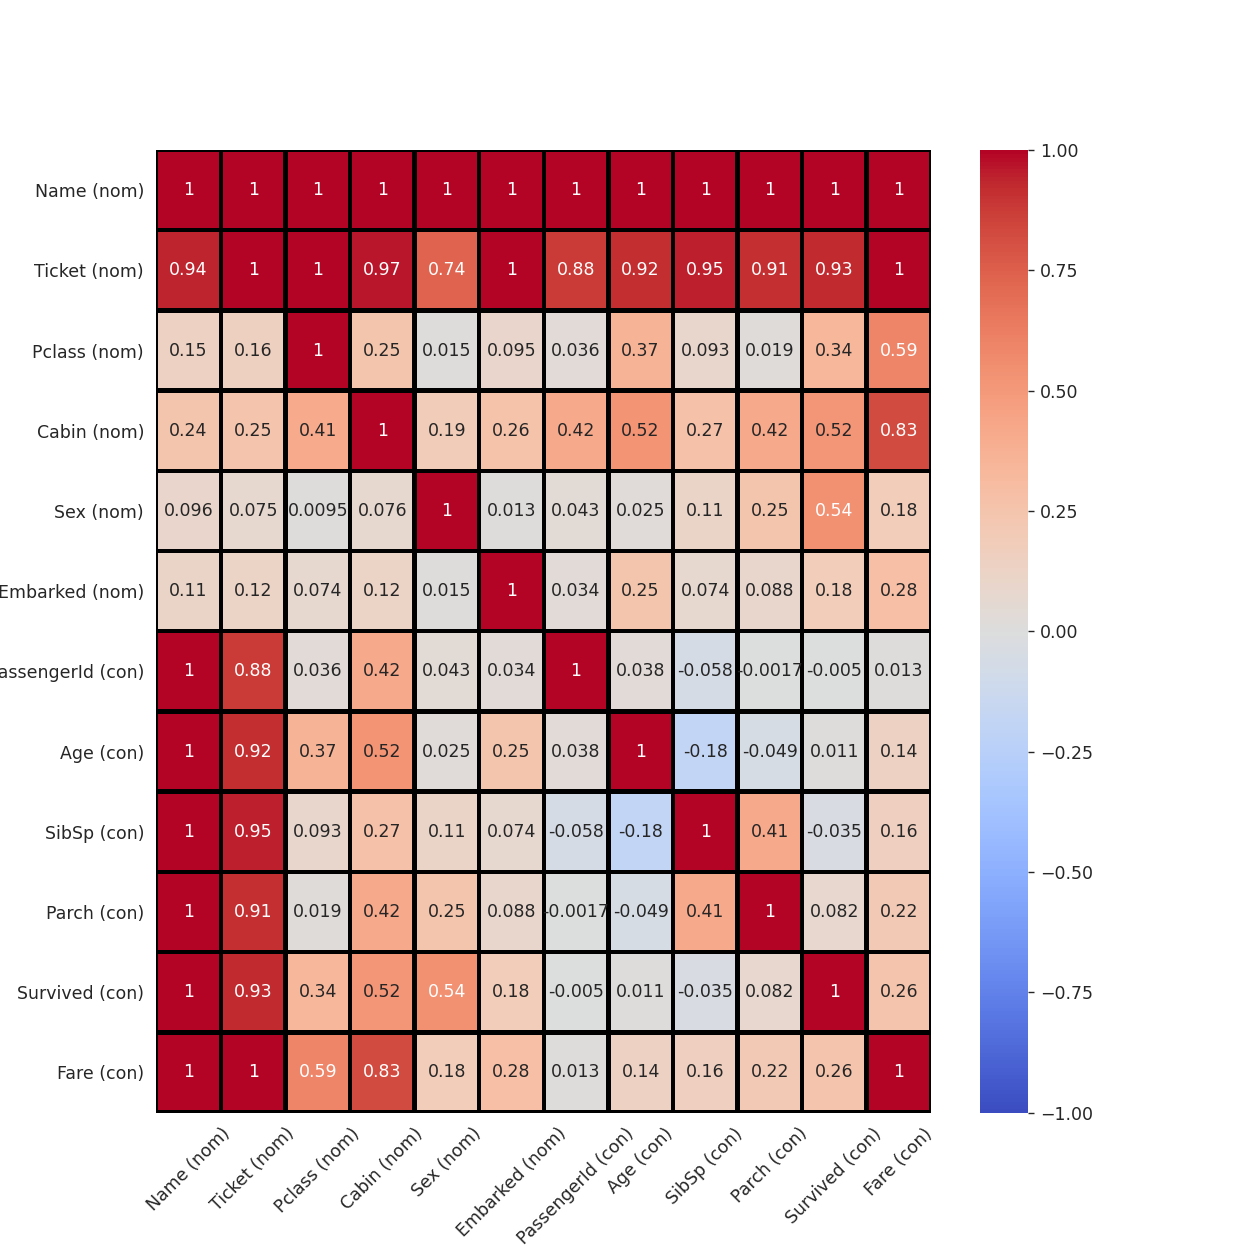

In [43]:
df_corr, df_corr_ordered, (fig, ax) = eda.associations(dataframe)

In [44]:
df_corr_ordered[0:50]

,Var_y,Var_x,Corr
0,Name (nom),Name (nom),1.000000
26,Pclass (nom),Pclass (nom),1.000000
132,Fare (con),Name (nom),1.000000
130,Survived (con),Survived (con),1.000000
120,Survived (con),Name (nom),1.000000
117,Parch (con),Parch (con),1.000000
108,Parch (con),Name (nom),1.000000
104,SibSp (con),SibSp (con),1.000000
96,SibSp (con),Name (nom),1.000000
91,Age (con),Age (con),1.000000


           Fare       Age     SibSp
Fare   1.000000  0.096067  0.159651
Age    0.096067  1.000000 -0.308247
SibSp  0.159651 -0.308247  1.000000


<IPython.core.display.Javascript object>


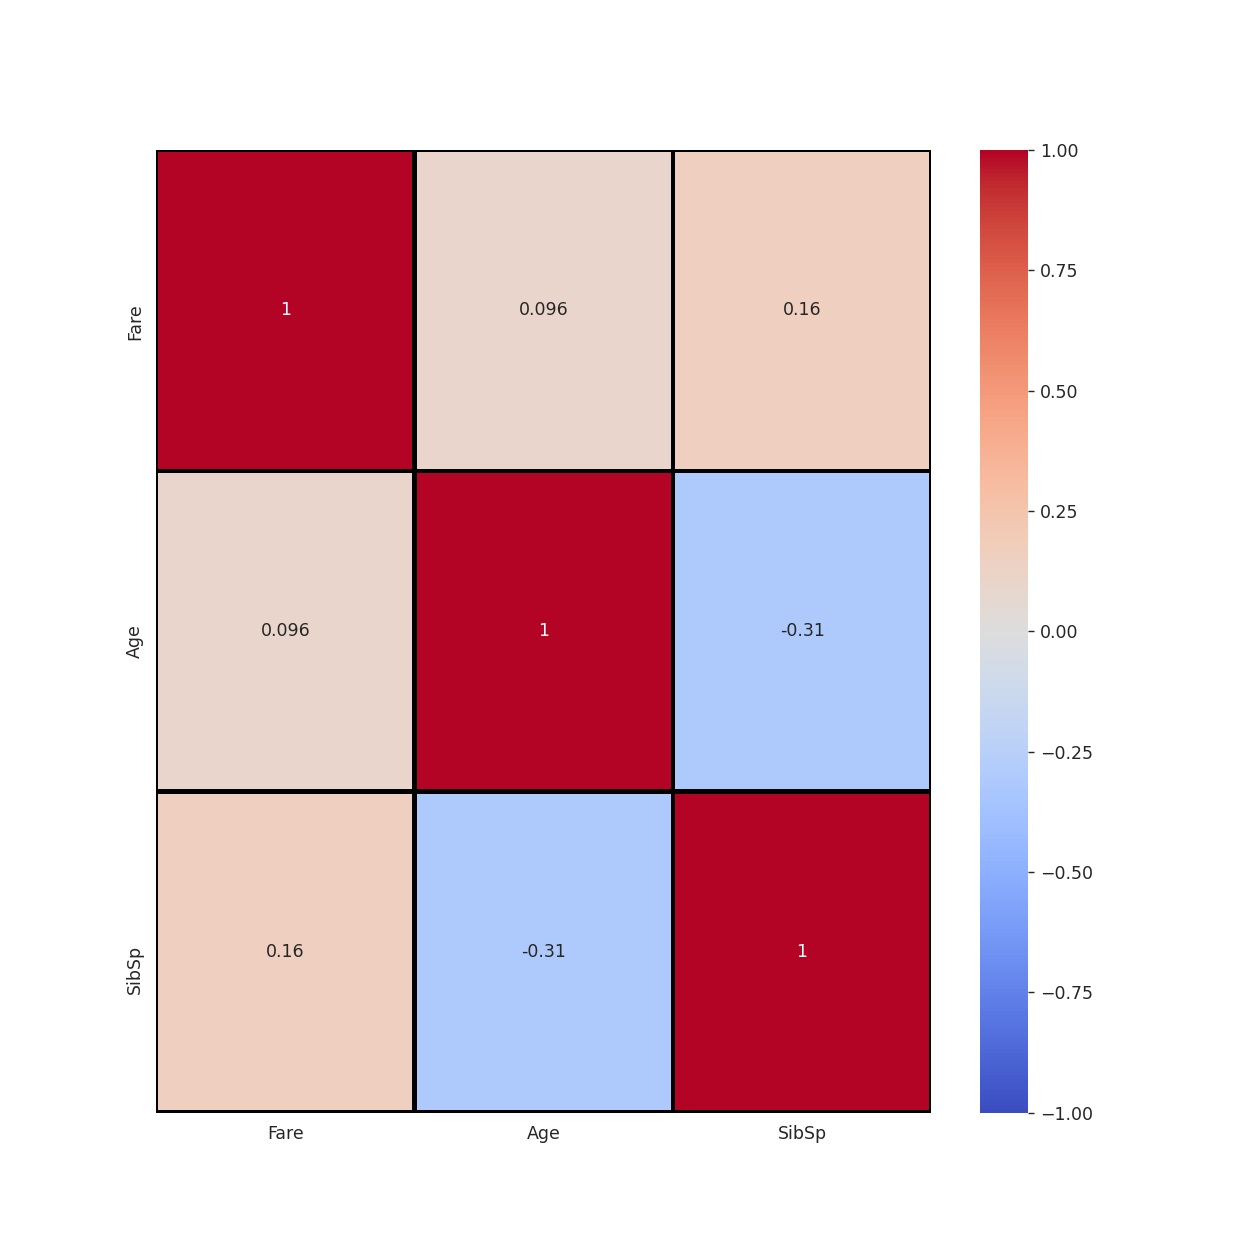

In [42]:
from scipy.cluster import hierarchy
numerical_columns = ['Age', 'SibSp', 'Fare']
df_corr = dataframe[numerical_columns].cov()
order = np.array(hierarchy.dendrogram(
    hierarchy.ward(df_corr),no_plot=True)['ivl'], dtype="int")
cr.correlation_map_numerical(dataframe, numerical_columns)
#order

In [31]:
hierarchy.dendrogram(
    hierarchy.ward(df_corr),no_plot=True)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 1.2553254974941805, 1.2553254974941805, 0.0],
  [0.0, 1.7305606580183972, 1.7305606580183972, 1.2553254974941805]],
 'ivl': ['0', '1', '2'],
 'leaves': [0, 1, 2],
 'color_list': ['C0', 'C0']}

<IPython.core.display.Javascript object>


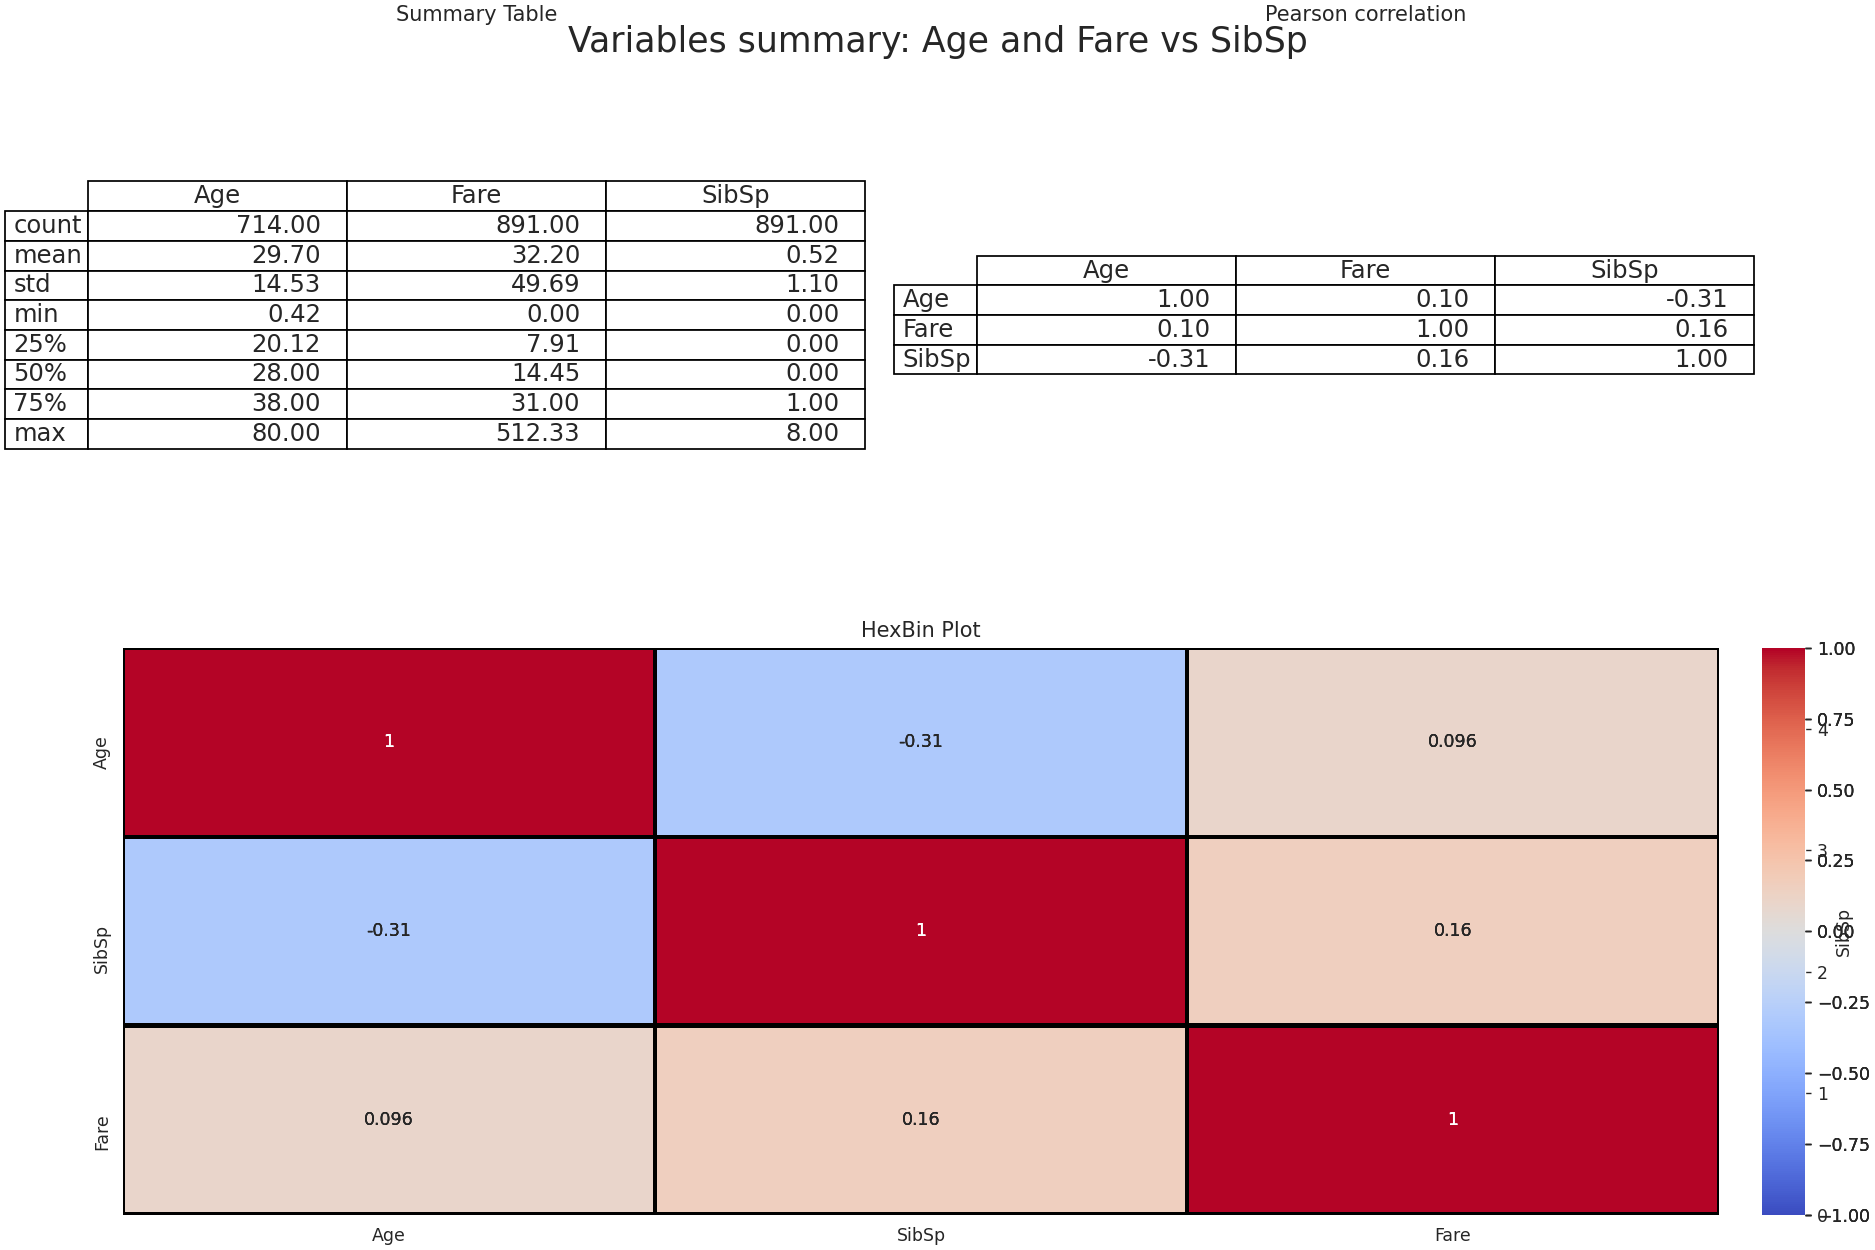

In [27]:
eda.two_numerical_vs_numerical(dataframe, column_num1, column_num2, column_num3,
                         palette=None, ax=None, order=None)